In [ ]:
!kaggle datasets download micheldc55/social-network-ads
!unzip social-network-ads.zip

Dataset URL: https://www.kaggle.com/datasets/micheldc55/social-network-ads
License(s): unknown
social-network-ads.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  social-network-ads.zip
  inflating: Social_Network_Ads.csv  


In [ ]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
df['Age'] = normalizer.fit_transform(df[['Age']])
df['EstimatedSalary'] = normalizer.fit_transform(df[['EstimatedSalary']])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,0.023810,0.029630,0
1,15810944,Male,0.404762,0.037037,0
2,15668575,Female,0.190476,0.207407,0
3,15603246,Female,0.214286,0.311111,0
4,15804002,Male,0.023810,0.451852,0


In [ ]:
df.drop('User ID', axis=1, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,0.023810,0.029630,0
1,Male,0.404762,0.037037,0
2,Female,0.190476,0.207407,0
3,Female,0.214286,0.311111,0
4,Male,0.023810,0.451852,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall: " , recall)

accuracy:  0.875
precision:  0.95
recall:  0.6785714285714286


<Axes: >

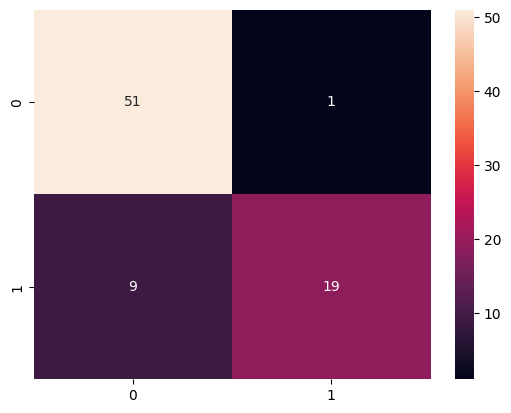

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

# Logistic Regression - Theory with Viva Q&A

## 1. What is Logistic Regression?

**Answer:**  
Logistic Regression is a statistical technique used for classification problems where the dependent variable is categorical (commonly binary: 0 or 1). It estimates the probability that a given input belongs to a particular category using the sigmoid function, and outputs values between 0 and 1.

---

## 2. How is Logistic Regression different from Linear Regression?

**Answer:**  
Linear regression is used for predicting continuous numerical values, while logistic regression is used for classifying categorical outcomes (especially binary). Linear regression uses a straight-line equation (y = b0 + b1x) while logistic regression uses the log-odds (logistic function) and applies the sigmoid function to map predictions between 0 and 1.

---

## 3. What is the Sigmoid Function?

**Answer:**  
The sigmoid function maps any real-valued number to a value between 0 and 1. It is defined by the formula:  
**S(x) = 1 / (1 + e^(-x))**  
It is used in logistic regression to convert linear outputs into probabilities.

---

## 4. What are the types of Logistic Regression?

**Answer:**  
- **Binary Logistic Regression**: Target variable has two categories (e.g., spam or not spam)
- **Multinomial Logistic Regression**: Target variable has more than two categories without order (e.g., predicting fruit type: apple, banana, mango)
- **Ordinal Logistic Regression**: Target variable has more than two categories with order (e.g., customer satisfaction: poor, average, good)

---

## 5. What is a Confusion Matrix?

**Answer:**  
A confusion matrix is a table used to evaluate the performance of a classification model by showing the relationship between actual and predicted classifications.

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

---

## 6. What is True Positive and False Positive?

**Answer:**  
- **True Positive (TP)**: The model correctly predicted positive class.
- **False Positive (FP)**: The model incorrectly predicted positive when it is actually negative.

---

## 7. What is Precision and Recall?

**Answer:**  
- **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.  
  **Precision = TP / (TP + FP)**

- **Recall (Sensitivity)** is the ratio of correctly predicted positive observations to all actual positives.  
  **Recall = TP / (TP + FN)**

---

## 8. What is F1 Score?

**Answer:**  
F1 Score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall and is especially useful when the dataset is imbalanced.  
**F1 Score = 2 * (Precision * Recall) / (Precision + Recall)**

---

## 9. What is the difference between Accuracy and Precision?

**Answer:**  
- **Accuracy** measures how often the model makes correct predictions overall.  
  **Accuracy = (TP + TN) / (TP + TN + FP + FN)**

- **Precision** measures how many of the predicted positives are actually positive. Precision focuses only on positive prediction correctness.

---

## 10. Where is Logistic Regression commonly used?

**Answer:**  
Logistic regression is commonly used in fields like:
- Email spam detection
- Medical diagnosis (disease prediction)
- Credit risk assessment
- Customer churn prediction
- Fraud detection

